<a href="https://colab.research.google.com/github/Baldros/BirdCLEFF-2024/blob/main/EAD_BirdCLEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação para comunicação com o Drive:
from google.colab import drive

# Acessando o Drive:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Criando um diretório:
!mkdir -p /root/.kaggle

# Copiando o Kaggle Json:
!cp '/content/drive/MyDrive/kaggle.json' '/root/.kaggle/'

# Verificando se o arquivo foi copiado corretamente:
!ls /root/.kaggle/

kaggle.json


In [ ]:
!kaggle competitions download -c birdclef-2024

100% 21.8G/21.8G [05:25<00:00, 60.4MB/s]
100% 21.8G/21.8G [05:25<00:00, 72.0MB/s]


In [ ]:
# Importa a biblioteca para manipulação de arquivos
from tqdm import tqdm
import zipfile

In [ ]:
# Define o caminho para o arquivo ZIP baixado
zip_file_path = "/content/birdclef-2024.zip"

# Define o diretório de destino para a extração
extract_dir = "/content/birdclef-2024"

# Extraindo arquivo:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Obtenha uma lista dos nomes dos arquivos no arquivo zip
    file_list = zip_ref.namelist()
    # Use tqdm para criar uma barra de progressão
    for file in tqdm(file_list, desc="Extracting"):
        zip_ref.extract(file, extract_dir)

Extracting: 100%|██████████| 32907/32907 [04:49<00:00, 113.69it/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando tabelas:
df = pd.read_csv('/content/birdclef-2024/train_metadata.csv');df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg


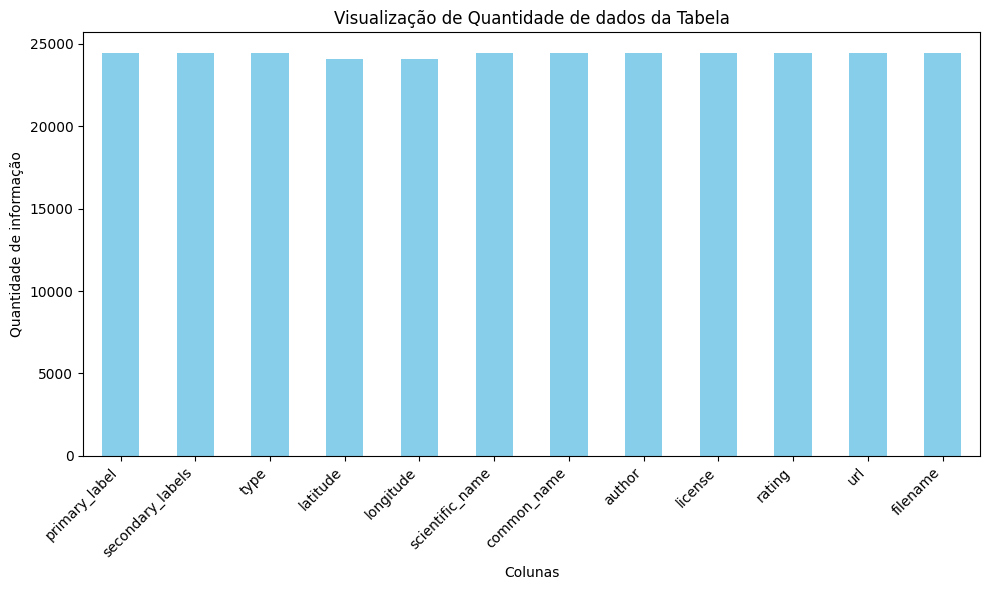

In [ ]:
# Contando o número de valores não-NaN em cada coluna
quantidade_nao_nan_por_coluna = df.notna().sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
quantidade_nao_nan_por_coluna.plot(kind='bar', color='skyblue')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de informação')
plt.title('Visualização de Quantidade de dados da Tabela')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Reconhecendo as variáveis que possuem dados NaN:
def checa_null(dataframe):
  colunas_nulas = 0
  enulo = dataframe.isnull().sum()
  for variavel, valor in enulo.items():
      if valor != 0.0:
        colunas_nulas += 1
        #print(str(variavel)+' -> '+str(valor))
        print(f'{variavel} -> {valor}, {round(valor/len(dataframe),2)*100}% do dataframe')

  if colunas_nulas == 0:
    print('Não há colunas com valores NaN')
checa_null(df)

latitude -> 378, 2.0% do dataframe
longitude -> 378, 2.0% do dataframe


In [ ]:
df.dropna(subset=['latitude'],inplace=True)
df.dropna(subset=['longitude'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24081 entries, 0 to 24458
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     24081 non-null  object 
 1   secondary_labels  24081 non-null  object 
 2   type              24081 non-null  object 
 3   latitude          24081 non-null  float64
 4   longitude         24081 non-null  float64
 5   scientific_name   24081 non-null  object 
 6   common_name       24081 non-null  object 
 7   author            24081 non-null  object 
 8   license           24081 non-null  object 
 9   rating            24081 non-null  float64
 10  url               24081 non-null  object 
 11  filename          24081 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.4+ MB


In [ ]:
import folium
import plotly.express as px

In [ ]:
#Tirando a média para ajudar na inicialização:
media_latitude = df['latitude'].mean()
media_longitude = df['longitude'].mean()

**Distribuição espacial das detecções**

    Aqui é um panorama geral da distribuição georeferênciada
    das capturas de sons dos pássaros.

In [ ]:
from folium.plugins import HeatMap

In [ ]:
fmap = folium.Map(location = [media_latitude,media_longitude], zoom_start=2, title = 'cartodbpositron')

heat_map = HeatMap(df[['latitude','longitude']])
fmap.add_child(heat_map)

display(fmap)

**Distribuição espacial dos autores**

    Aqui estamos analisando a distribuição das capturas
    de cada autor. A lista está ordenada pela quantidade
    de capturas que o autor fez sendo o "1º contribuinte",
    sendo o cara que mais tem captura no dataset e assim
    por diantes.

In [ ]:
# Conta a frequência de cada autor
author_counts = df['author'].value_counts()

# Ordena os valores em ordem decrescente
author_counts_sorted = author_counts.sort_values(ascending=False)

# Obtém a lista de nomes dos autores em ordem decrescente de frequência
authors_sorted = author_counts_sorted.index.tolist()

In [ ]:
for i,autor in enumerate(authors_sorted[:5]):
  # Fitrando por author:
  df_filtrado = df[df['author'] == autor]

  # Cordenada Média:
  media_latitude = df_filtrado['latitude'].mean()
  media_longitude = df_filtrado['longitude'].mean()

  print(f'Autor {autor}, {i+1}º contribuinte')
  # Mapa:
  fmap = folium.Map(location = [media_latitude,media_longitude], zoom_start=2, title = 'cartodbpositron')
  heat_map = HeatMap(df_filtrado[['latitude','longitude']])
  fmap.add_child(heat_map)

  display(fmap)

Autor Albert Lastukhin, 1º contribuinte


Autor José Carlos Sires, 2º contribuinte


Autor Stanislas Wroza, 3º contribuinte


Autor Mike Nelson, 4º contribuinte


Autor Bram Piot, 5º contribuinte


In [ ]:
df.columns

Index(['primary_label', 'secondary_labels', 'type', 'latitude', 'longitude',
       'scientific_name', 'common_name', 'author', 'license', 'rating', 'url',
       'filename'],
      dtype='object')

In [ ]:
lista = ['primary_label','scientific_name', 'common_name', 'author']

In [ ]:
df.author.value_counts()

author
Albert Lastukhin     913
José Carlos Sires    874
Stanislas Wroza      740
Mike Nelson          671
Bram Piot            519
                    ... 
om                     1
Seth Miller            1
Kees van Reenen        1
Vaibhav                1
Alexander Schille      1
Name: count, Length: 1901, dtype: int64

In [ ]:
# Define a cor das barras
color_palette = px.colors.qualitative.Plotly

# Cria o gráfico de barras
fig = px.bar(df, y='author', color='author', color_discrete_sequence=color_palette)

# Atualiza o layout para ajustar o tamanho e a estética
fig.update_layout(
    title='Contagem de Autores',
    xaxis_title='Contagem',
    yaxis_title='Autor',
    width=800,  # Ajuste o tamanho da figura conforme necessário
    height=600,  # Ajuste o tamanho da figura conforme necessário
    plot_bgcolor='rgba(0,0,0,0)',  # Define o fundo do gráfico como transparente
    paper_bgcolor='rgba(0,0,0,0)',  # Define o fundo do papel como transparente
    font=dict(
        family="Arial",  # Escolha a fonte
        size=12,  # Tamanho da fonte
        color="black"  # Cor do texto
    )
)

# Exibe o gráfico
fig.show()

**Checando se as pastas são para cada espécie de passaro**

    Levando em consideração que cada pasta é contendo os dados
    de treino é representada como primary_label na tabela, a ideia
    aqui é checar se de fato cada pasta se refere a uma espécie de
    passaro.

    A solução aqui implementada é bem rudimentar, mas julgo útil.
    Basicamente, a ideia aqui é filtrar o dataset por espécie se
    na coluna primary_label aparece apenas uma única pasta.

In [ ]:
passaros = df['scientific_name'].unique()

for passaro in passaros:
  # Fitrando por author:
  df_filtrado = df[df['scientific_name'] == passaro]
  check = df_filtrado['primary_label'].unique()
  if len(check) != 1:
    print('Uhm, temos um problema:')
    display(df_filtrado['primary_label'].value_counts())
    print()
  else:
    print(f'pasta \033[1m{check}\033[0m -> espécia \033[1m{passaro}\033[0m')

pasta ['asbfly'] -> espécia Muscicapa dauurica
pasta ['ashdro1'] -> espécia Dicrurus leucophaeus
pasta ['ashpri1'] -> espécia Prinia socialis
pasta ['ashwoo2'] -> espécia Artamus fuscus
pasta ['asikoe2'] -> espécia Eudynamys scolopaceus
pasta ['asiope1'] -> espécia Anastomus oscitans
pasta ['aspfly1'] -> espécia Terpsiphone paradisi
pasta ['aspswi1'] -> espécia Cypsiurus balasiensis
pasta ['barfly1'] -> espécia Ficedula nigrorufa
pasta ['barswa'] -> espécia Hirundo rustica
pasta ['bcnher'] -> espécia Nycticorax nycticorax
pasta ['bkcbul1'] -> espécia Rubigula gularis
pasta ['bkrfla1'] -> espécia Dinopium benghalense
pasta ['bkskit1'] -> espécia Elanus caeruleus
pasta ['bkwsti'] -> espécia Himantopus himantopus
pasta ['bladro1'] -> espécia Dicrurus macrocercus
pasta ['blaeag1'] -> espécia Ictinaetus malaiensis
pasta ['blakit1'] -> espécia Milvus migrans
pasta ['blhori1'] -> espécia Oriolus xanthornus
pasta ['blnmon1'] -> espécia Hypothymis azurea
pasta ['blrwar1'] -> espécia Acrocephalu

**Conclusão**

    Vemos então que de fato cada pasta é para uma espécie.

**Contagem de capturas de sons por autores**

    Esse gráfico nos informa sobre a proporção de arquivos por pasta,
    informando também quem foram os autores que capitaram aquele passaro.

In [ ]:
fig = px.bar(df, y='scientific_name', color='author',width=1920,  height=1080,title="Passaro por author")
fig.show()

In [ ]:
# Contando o número de ocorrências de cada autor
license_counts = df['license'].value_counts()

# Criando o DataFrame com os dados de contagem
df_license = license_counts.reset_index()
df_license.columns = ['license', 'count']

# Criando o gráfico de pizza
fig = px.pie(df_license, names='license', values='count', title='Contagem de Observações por Autor')
fig.show()
